In [200]:
import matplotlib.pyplot as plt
from networkx import nx
import numpy as np
import sys
#import random
from random import choice

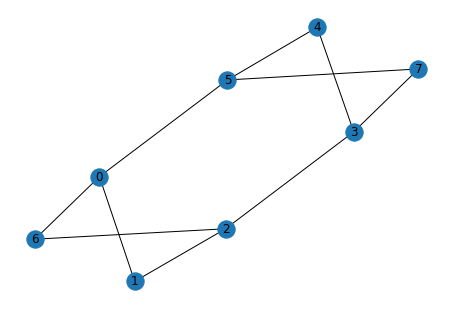

EdgeDataView([(0, 1, {'weight': 1.03}), (0, 5, {'weight': 1.03}), (0, 6, {'weight': 1.03}), (7, 3, {'weight': 1.03}), (7, 5, {'weight': 1.03}), (1, 2, {'weight': 1.03}), (5, 4, {'weight': 1.03}), (6, 2, {'weight': 1.03}), (2, 3, {'weight': 1.03}), (3, 4, {'weight': 1.03})])

In [72]:
G = nx.Graph()
G.add_nodes_from([0, 7])
G.add_edge(0,1, weight=1.03)
G.add_edge(0,5, weight=1.03)
G.add_edge(0,6, weight=1.03)
G.add_edge(1,2, weight=1.03)
G.add_edge(2,6, weight=1.03)
G.add_edge(2,3, weight=1.03)
G.add_edge(3,4, weight=1.03)
G.add_edge(3,7, weight=1.03)
G.add_edge(4,5, weight=1.03)
G.add_edge(5,7, weight=1.03)

#for u,v,d in G.edges(data=True):
#    d['weight']=1.03

#G[2][3]['weight'] = 1.03*2
nx.draw(G,with_labels = True)
plt.show()
G.nodes
G.edges.data()

In [136]:
class Network:
    
    def __init__(self, Graph, alpha = 1.0, delta = 1.0, Pmax = 0.1, Pvals = None):
        self.G = Graph
        self.alpha = alpha
        self.delta = delta
        self.Pmax = Pmax
        self.Pvals = Pvals
        self.createArrays()
        self.Pvals()
        
    def createArrays(self):
        self.nodes = G.number_of_nodes()
        self.AV = [n for i in sorted(G.nodes) for n in G.neighbors(i)]
        self.connections = len(self.AV)
        
        self.AI = [0]
        tmp = 0
        for i in sorted(G.nodes):
            tmp += len([n for n in G.neighbors(i)])
            self.AI.append(tmp)
        
        #self.weights = [ G[i][n][0]['weight'] for i in sorted(G.nodes) for n in G.neighbors(i) ] if multiedge
        self.weights = [ G[n][i]['weight'] for i in sorted(G.nodes) for n in G.neighbors(i) ]
        assert(len(self.weights) == self.connections)
        
    def Pvals(self):
        if self.Pvals == None:
            a = random.sample(G.nodes, int(len(G)/2))
            b = G.nodes - a
            self.Pvals = []
            for i in range(len(self.G)):
                if i in a:
                    self.Pvals.append(1)
                else:
                    self.Pvals.append(-1)
        
    def PrintOnFile(self):

        with open('out.h', mode='wt', encoding='utf-8') as f:
            print("#ifndef NETWORK \n#define NETWORK\n ", file = f)
            print("#define nodes ", self.nodes, file = f)
            print("#define connections ", self.connections, file = f)
            print("#define alpha ", self.alpha, file = f)
            print("const double P[nodes] = ", "{" + ", ".join([str(x) for x in self.Pvals]) + "}", ";", file = f)
            print("const int AI[nodes+1] =", "{" + ", ".join([str(x) for x in self.AI]) + "}",";", file = f)
            print("const int AV[connections] =", "{" + ", ".join([str(x) for x in self.AV]) + "}", ";", file = f)
            print("double weights[connections] =", "{" + ", ".join([str(x) for x in self.weights]) + "}", ";", file = f)
            print("double Pmax = ", self.Pmax, ";", file = f)
            print("double delta = ", self.delta, ";", file = f)
            print("\n#endif", file = f)
        f.close
        
    def get_generators(self):
        return self.Pvals
        

In [75]:
#G.nodes.data()
#G.edges.data()

In [108]:
G.get_edge_data(0, 9)

6


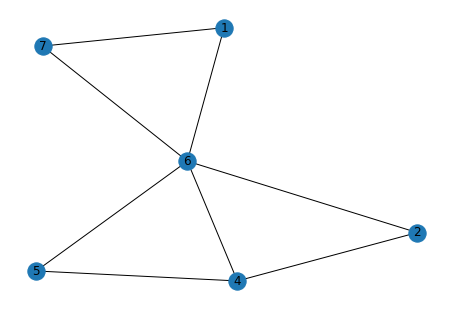

In [157]:
G = nx.erdos_renyi_graph(n = 8, p = 0.3)
G.remove_nodes_from(list(nx.isolates(G)))

nx.draw(G,with_labels = True)
print(len(G))

for source, target in G.edges():
    G[source][target]['weight'] = 1.03

In [158]:
print(nx.is_connected(G))
net = Network(G)
net.PrintOnFile()

True


In [250]:
class Define_Net():
    
    def __init__(self, n, p):
        self.n = n
        self.p = p
        self.create_network()
        
    def create_network(self):

        self.G = nx.erdos_renyi_graph(n = self.n, p = self.p)
        self.G.remove_nodes_from(list(nx.isolates(self.G)))
        while nx.is_connected(self.G) == False:
            self.G = nx.erdos_renyi_graph(n = self.n, p = self.p)
            self.G.remove_nodes_from(list(nx.isolates(self.G)))
            
        self.G = nx.relabel_nodes(self.G, dict(zip(self.G.nodes(), range(len(self.G)))))
        for source, target in self.G.edges():
            self.G[source][target]['weight'] = 1.03

    def plot_net(self):
        nx.draw(self.G,with_labels = True)
        
    def get_network(self):
        return self.G


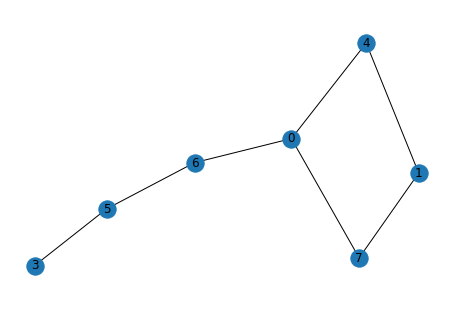

In [195]:
create_net = Define_Net(8, 0.3)
create_net.plot_net()
G = create_net.get_network()

net = Network(G)
net.PrintOnFile()

In [211]:
print(nx.degree_centrality(G))
print(nx.eigenvector_centrality(G))
print(nx.katz_centrality(G))
print(nx.closeness_centrality(G))
print(nx.betweenness_centrality(G))
saved = G

{0: 0.5, 1: 0.3333333333333333, 3: 0.16666666666666666, 4: 0.3333333333333333, 5: 0.3333333333333333, 6: 0.3333333333333333, 7: 0.3333333333333333}
{0: 0.5518645418393872, 1: 0.39541677590598023, 3: 0.09032727117719543, 4: 0.43276507709219536, 5: 0.19771469543896603, 6: 0.3424467260472115, 7: 0.43276507709219536}
{0: 0.4147773428007873, 1: 0.37682126637663454, 3: 0.33808335373884046, 4: 0.3799842589324564, 5: 0.3725888876059625, 6: 0.3795610382926321, 7: 0.3799842589324564}
{0: 0.6, 1: 0.375, 3: 0.3157894736842105, 4: 0.46153846153846156, 5: 0.42857142857142855, 6: 0.5454545454545454, 7: 0.46153846153846156}
{0: 0.6333333333333333, 1: 0.03333333333333333, 3: 0.0, 4: 0.13333333333333333, 5: 0.3333333333333333, 6: 0.5333333333333333, 7: 0.13333333333333333}


In [214]:
nx.k_components(G)

{2: [{0, 1, 4, 7}], 1: [{0, 1, 3, 4, 5, 6, 7}]}

In [231]:
Pvals

[1, -1, -1, -1, 1, 1, -1]

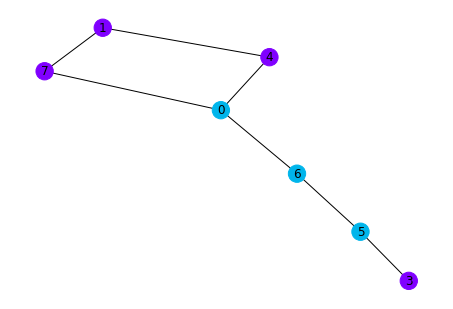

In [232]:
nx.draw(G, node_color = Pvals, vmin=0, vmax=4, cmap = plt.cm.get_cmap('rainbow'), with_labels = True)